## 회귀분석 (Regression)


- 독립변수(X)와 종속변수(Y)의 관계식에서
  독립변수가 한 단위 증가할 때 종속변수가 얼마나 영향을 받는지 분석
  

[예] 연속형변수와 연속형 변수를 비교할 때


- 나이(X)가 많을 수록 소득(Y)가 높은지 분석
- 광고지불비(X)에 따라 판매량이 영향을 받는지 분석
- 가계 수입과 사교육비 지출 사이에 관계가 있는지 분석
- 신종코로나 추이 분석 (https://news.v.daum.net/v/20200213050105962)


[참고] 도서 '모두의 딥러닝'
<img src='./imgs/regression1.png' width='500'>
<img src='./imgs/regression2.png' width='500'>
<img src='./imgs/regression3.png' width='500'>

** 회귀분석 종류

1) 단순회귀 분석 : 독립변수가 1개
        
        ` 광고지불비(X)를 이용하여 상품 매출액(Y) 예측할 때
        
2) 다중회귀 분석 : 독립변수가 2개 이상
       
       ` 어린이 연령(X1)과 하루 평균 학습시간(X2)를 이용하여 그 어린이의 성적(Y)을 예측하고자 할 때



In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy import stats
from matplotlib import font_manager, rc
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.datasets import make_regression

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 단순회귀분석 ( 선형회귀분석 )

- 독립변수가 1개인 경우

- 전기생산량(독립변수)과 전기소비량(종속변수)의 영향


    - 귀무가설 : 전기생산량과 전기소비량 간에 상관관계가 없다
    - 대립가설 : 전기생산량과 전기소비량 간에 상관관계가 있다

In [3]:
# 월별 전기생산금액
x= [3.52, 2.51, 3.91, 4.07, 3.98, 4.29, 4.81, 3.73, 4.61, 3.39, 3.20]

# 월별 전기 사용량
y= [2.48, 2.27, 2.47, 2.37, 3.09, 3.18, 3.88, 3.03, 3.55, 2.99, 2.88]


In [5]:
##### 단순회귀분석

result = stats.linregress(x,y)
result 




LinregressResult(slope=0.5546831443969521, intercept=0.8074740247672794, rvalue=0.7200942961345399, pvalue=0.012451312531534768, stderr=0.17816251936092412)

- 기울기(slope)
- 절편(intercept)
- 상관계수(rvalue) :상관관계의 정도를 파악하는 값 ( -1에서 1 )
                    - 1에 근접하면 양의 상관관계
                    - -1에 근접하면 음의 상관관계
                    - 0에 근접하면 상관관계가 없다
- pvalue : 예측 불확실성의 정도를 나타내는 값
- 에러의 표준편차(stderr)


* 상관분석 : 두 변수 간에 선형적 관계가 있는지 분석
* 상관계수 : 상관관계의 정도를 파악하는 값 ( -1에서 1 )
                    - 1에 근접하면 양의 상관관계
                    - -1에 근접하면 음의 상관관계
                    - 0에 근접하면 상관관계가 없다
                    
1) pvalue가 0.05보다 작으므로 통계적으로 유의미하기에
귀무가설을 기각하고 대립가설을 채택하여
전기생랸량과 소비생산량 간에 상관관계가 있다 

2) rvalue(상관계수)가 1에 가까우므로 양의 상관관계가 있다고 볼 수 있다 

기울기 : 0.5546831443969521
절편 : 0.8074740247672794
설명력 : 0.7200942961345399
p_value : 0.012451312531534768
귀무가설 기각 대립가설 채택, 전기생산량과 소비생산량간에 상관관계가있음


Text(0, 0.5, '전기사용량')

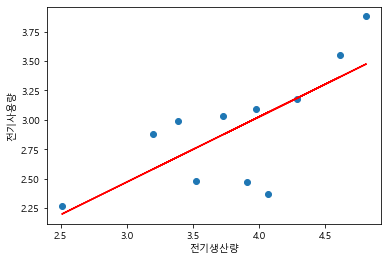

In [16]:
##### 선형 회귀 분석값 얻어오기
slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)
print('기울기 :', slope)
print('절편 :' , intercept)
print('설명력 :', r_value)
print('p_value :',p_value)

if p_value < 0.05:
    print('귀무가설 기각 대립가설 채택, 전기생산량과 소비생산량간에 상관관계가있음')
else :
    print('상관관계가 없음')

##### 산점도 그리기
plt.scatter(x,y)


##### 회귀선 그리기
x1 = np.array(x)
plt.plot(x1,x1*slope+intercept, c='red')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')

In [18]:
# 전기생산량 4인경우
4 *slope + intercept

3.0262066023550878

In [17]:
# 전기생산량 6인경우
6 *slope + intercept

4.135572891148993

### 회귀분석 예제 - 단순회귀분석(선형회귀분석)

#### 오존 데이터셋에서 온도에 따른 오존량 예측

- 독립변수 : 온도(수치형),   종속변수 : 오존량(수치형)
- 독립변수가 하나이기에 단순회귀분석(선형회귀분석) 적용


- 귀무가설 : 온도가 오존량에 영향을 미치지 않는다
- 대립가설 : 온도가 오존량에 영향을 미친다


In [26]:
df = pd.read_csv('../data/ozone/ozone.csv')
df.head()
df.tail()


,Ozone,Solar.R,Wind,Temp,Month,Day
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


----------------------------------------------
[ * 작업단계 *]

1.  결측치 행 제거

2. 온도(Temp) 데이타 X와 오존(Ozone) 데이타 Y를 추출

3. 회귀분석 결과 출력

[ *  회귀 분석의 결과에 대한 분석 * ]

In [33]:
df2 =df.dropna()
df2.shape

(111, 6)

In [35]:
result = stats.linregress(df2['Temp'],df2['Ozone'])
result

LinregressResult(slope=2.439109905529362, intercept=-147.64607238059494, rvalue=0.6985414096486389, pvalue=1.552677229392932e-17, stderr=0.23931937849409174)

- 귀무가설 : 온도가 오존에 영향을 미치지 않는다
- 대립가설 : 온도가 오존에 영향을 미친다

p_value(1.5 * 10(-17) == 0.000000000000000015) < 0.05 : 대립가설 채택
rvalue = 0.7 -> 즉, 70%의 설명력을 갖는다

------------------------------------------------------
[ * 작업단계 *]

4. 산점도와 회귀선 그리기

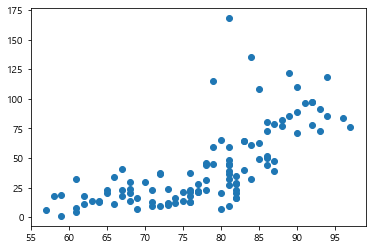

In [36]:
plt.scatter(df2['Temp'],df2['Ozone'])


Text(0, 0.5, '오존')

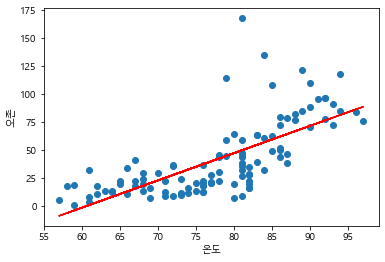

In [44]:
plt.scatter(df2['Temp'],df2['Ozone'])

x = np.array(df2['Temp'])
plt.plot(x,x*result.slope+result.intercept, c='red')
plt.xlabel('온도')
plt.ylabel('오존')

In [37]:
# 온도가 화씨 70도라면 오존량이 얼마일까? 예측
70 * slope + intercept

39.63529413255393

## 회귀분석 예제 - 보스턴 주택가격

- mglearn 패키지 설치

콘솔에서 > pip install mglearn 

또는

쥬피터에서는 !pip install mglearn 


In [46]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=8525260cd6a8b3d37226014094a70c3f2f1dea105e88a3508dd9e238d13eb32c
  Stored in directory: c:\users\kosmo_04\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [47]:

import mglearn

# 보스턴 주택가격 데이터셋
from sklearn.datasets import load_boston

# 회귀분석을 위한 패키기
from sklearn.linear_model import LinearRegression

# 학습용, 검증용 데이터를 나누기 위한 패키기
from sklearn.model_selection import train_test_split

In [50]:
boston = load_boston()
boston
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

속성정보:
    - CRIM     인구 1인당 범죄 수
    - ZN       25000평방 피트 이상의 주거 구역 비중
    - INDUS    소매업 외 상업이 차지하는 면접 비율
    - CHAS     찰스강 위치 변수 (1: 강주변, 0:이외 )
    - NOX      일산화질소 농도 (parts per 10 million)
    - RM       집의 평균 방수
    - AGE      1940년 이전에 지어진 비율
    - DIS      5가지 보스턴 시 고용 시설까지의 거리
    - RAD      순환고속도로의 접근 용이성
    - TAX      $10000 달러당 부동산 세율 총계

    - PTRATIO  지역별 학생과 교사 비율
    - B        지역별 흑인 비율
    - LSTAT    급여가 낮은 직업에 종사하는 인구 비율(%)
    - MEDV     가격단위($1000)

In [58]:
df = pd.DataFrame(boston.data)
df

df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
# 데이터(x)와 레이블(y) 지정

x = df # 입력 데이터 ( 13개의 특성 )
y = boston.target # 답 ( 주택 가격 )

In [71]:
# 데이터셋에서 훈련데이터셋과 검증(테스트)데이터셋을 분리 (7:3, 8:2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)


In [72]:
x_train.head()
y_train[:5]
x_test.head()
x_train.shape
x_test.shape

(102, 13)

In [75]:
# 모델에 학습하기
lr = LinearRegression().fit(x_train,y_train) # 학습데이터와 학습라벨


LinearRegression()

In [76]:
# 검증하기
result_train = lr.score(x_train,y_train)
result_test = lr.score(x_test,y_test)
print('훈련 데이터 점수 : {:2f}'.format(result_train))
print('테스트 데이터 점수 : {:2f}'.format(result_test))

훈련 데이터 점수 : 0.773014
테스트 데이터 점수 : 0.589222


In [77]:
x.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [78]:
y[0]

24.0

In [90]:
# sample_x =np.array([x.iloc[0]])
sample_x = np.array([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]])

In [91]:
sample_y = lr.predict(sample_x)
sample_y

array([30.49949836])